# Bài 1

### 10 datapoints

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

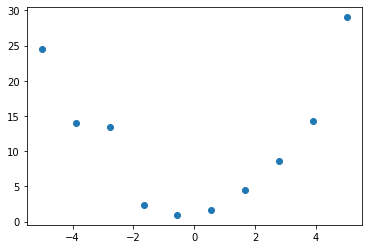

In [42]:
N = 10
X = (5*np.linspace(-1, 1, num=10, endpoint=True)).reshape(-1, 1)
y = X**2 + 2.5*np.random.randn(N, 1)
plt.scatter(X, y)
plt.show()

In [43]:
Xbar = np.ones((X.shape[0], 1))
for i in range(1, 10):
    Xbar = np.concatenate((Xbar, X**i), axis=1)


Train

In [44]:
model = LinearRegression(fit_intercept=False)
model.fit(Xbar, y)

LinearRegression(fit_intercept=False)

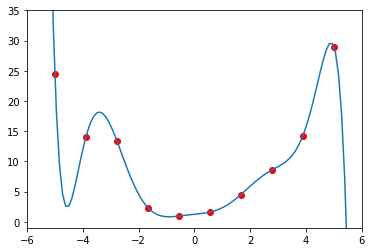

In [60]:
w = model.coef_.reshape(-1, 1)

x0 = np.linspace(-5.5, 5.5, num=100, endpoint=True).reshape(-1, 1)
X0bar = np.ones_like(x0)
for i in range(1, 10):
    X0bar = np.concatenate((X0bar, x0**i), axis=1)

y0 = X0bar.dot(w)
plt.scatter(X, y, c='r')
plt.plot(x0, y0)
plt.xlim([-6, 6])
plt.ylim([-1, 35])
plt.show()


<h3> &rarr; Đã xảy ra overfitting<h3>

### 100 datapoints

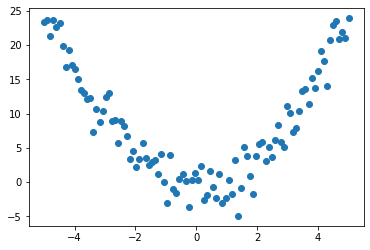

In [66]:
N = 100
X = (5*np.linspace(-1, 1, num=N, endpoint=True)).reshape(-1, 1)
y = X**2 + 2*np.random.randn(N, 1)
plt.scatter(X, y)
plt.show()

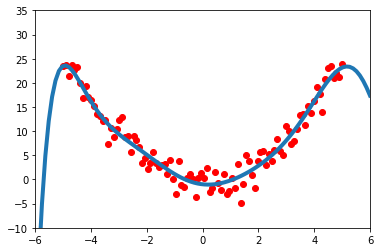

In [71]:
Xbar = np.ones((X.shape[0], 1))
for i in range(1, 10):
    Xbar = np.concatenate((Xbar, X**i), axis=1)

model = LinearRegression(fit_intercept=False)
model.fit(Xbar, y)

w = model.coef_.reshape(-1, 1)

x0 = np.linspace(-6, 6, num=100, endpoint=True).reshape(-1, 1)
X0bar = np.ones_like(x0)
for i in range(1, 10):
    X0bar = np.concatenate((X0bar, x0**i), axis=1)

y0 = X0bar.dot(w)
plt.scatter(X, y, c='r')
plt.plot(x0, y0, linewidth=4)
plt.xlim([-6, 6])
plt.ylim([-10, 35])
plt.show()


<h3> &rarr; Vẫn xảy ra overfitting<h3>

# Bài 2

## Convolution

In [103]:
def convolution(X, kernel, p=1, s=1):
    (m, n) = X.shape
    k = kernel.shape[0]
    m_Y = int((m-k+2*p)/s + 1)
    n_Y = int((n-k+2*p)/s + 1)

    Y = np.zeros((m_Y, n_Y))
    pad_m = np.zeros((m, p))
    X = np.concatenate((pad_m, X, pad_m), axis=1)
    pad_n = np.zeros((p, X.shape[1]))
    X = np.concatenate((pad_n, X, pad_n), axis=0)

    for r in range(m_Y):
        for c in range(n_Y):
            A = X[r*s:r*s+k, c*s:c*s+k]
            Y[r, c] = np.sum(A*kernel)
    return (X, Y)

In [92]:
X = np.ones((5,5))
kernel = np.ones((5,5))
    
(X_res, Y) = convolution(X, kernel, 1, 1)
print(X_res)
print(Y)


[[0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[16. 20. 16.]
 [20. 25. 20.]
 [16. 20. 16.]]


In [93]:
test_x = np.array([
    [1, 6, 4, 6, 4],
    [7, 3, 7, 9, 4],
    [5, 6, 7, 8, 3],
    [1, 3, 6, 3, 5]
])

test_w = np.array([
    [1, 0, 1, 0, 1],
    [0, 1, 0, 1, 0],
    [1, 0, 1, 0, 1],
    [0, 1, 0, 1, 0],
    [1, 0, 1, 0, 1]
])

(X_res, Y) = convolution(test_x, test_w, s=1, p=2)
print(X_res)
print(Y)


[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 6. 4. 6. 4. 0. 0.]
 [0. 0. 7. 3. 7. 9. 4. 0. 0.]
 [0. 0. 5. 6. 7. 8. 3. 0. 0.]
 [0. 0. 1. 3. 6. 3. 5. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[20. 40. 36. 37. 27.]
 [33. 35. 56. 36. 36.]
 [23. 47. 42. 48. 30.]
 [27. 30. 44. 28. 30.]]


In [94]:
(X_res, Y) = convolution(test_x, test_w, s=2, p=2)
print(X_res)
print(Y)

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 6. 4. 6. 4. 0. 0.]
 [0. 0. 7. 3. 7. 9. 4. 0. 0.]
 [0. 0. 5. 6. 7. 8. 3. 0. 0.]
 [0. 0. 1. 3. 6. 3. 5. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[20. 36. 27.]
 [23. 42. 30.]]


## Sobel

In [108]:
def sobel(X):
    Gx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
    Gy = Gx.T.copy()

    (_, Gx) = convolution(X, Gx)
    (_, Gy) = convolution(X, Gy)

    G = np.sqrt((Gx**2 + Gy**2))
    return G


In [101]:
import cv2

In [110]:
image = cv2.imread('image.jpg')
w = int(image.shape[1]/2)
h = int(image.shape[0]/2)
dim = (w, h)

# resize image
image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edge = sobel(gray_image)

cv2.imshow('origin', image)
cv2.waitKey()
cv2.imshow('gray', gray_image)
cv2.waitKey()
cv2.imshow('edge', edge)
cv2.waitKey()
cv2.destroyAllWindows()


# Bài 3

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D,  MaxPool2D, Conv3D, MaxPool3D
from keras.utils import np_utils
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
from keras.datasets import mnist
import tensorflow as tf
from sklearn.model_selection  import train_test_split

## Rerun code

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_val, y_val = x_train[50_000:60_000, :], y_train[50_000:60_000]
x_train, y_train = x_train[:50_000, :], y_train[:50_000]
print("Training shape: \t", x_train.shape)
print('Validation shape: \t', x_val.shape)

Training shape: 	 (50000, 28, 28)
Validation shape: 	 (10000, 28, 28)


In [4]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_val = x_val.reshape((x_val.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# normalize
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

print(x_train.shape)

(50000, 28, 28, 1)


In [5]:
print('Origin: ', y_train[0])
y_train = np_utils.to_categorical(y_train, 10)
y_val = np_utils.to_categorical(y_val, 10)
y_test = np_utils.to_categorical(y_test, 10)
print('One-hot: ', y_train[0])

Origin:  5
One-hot:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Định nghĩa model:
1. Model = Sequential() để định nghĩa model bằng cách xếp chồng các layer lên nhau để tạo thành model. Ví dụ: Input -> CONV -> POOL -> FLATTEN -> FC -> OUTPUT
2. Layer đầu tiên cần chỉ rõ input_shape của ảnh, input_shape=(W, H, D).
3. Khi thêm Convolutional Layer thì ta cần chỉ rõ các tham số: K (số lượng kernel), kernel size (W, H), hàm activation sử dụng. Cấu trúc như sau: model.add(Conv2D(K, (W, H), activation='myFunction'))
4. Khi thêm MaxPooling layer thì cần chỉ rõ size của kernel, model.add(MaxPooling2D(pool_size=(W, H))
5. Bước Flatten chuyển từ tensor thành vector nên chỉ cần thên layer Flatten
6. Để thêm Fully Connected Layer (FC) cần chỉ rõ số lượng node trông layer và hàm activation sử dụng trong layer, cấu trúc: model.add(Dense(số node, activation='myFunction'))

In [5]:
model = Sequential()

# padding có 2 giá trị là same và valid. same là tìm padding để giữ nguyên kích thước hoặc thích hợp để thực hiện các phép toán, valid là giữ nguyên kích thước
model.add(Conv2D(32, (3, 3), padding="same",
          activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

H = model.fit(x_train, y_train,
              validation_data=(x_val, y_val),
              batch_size=32,
              epochs=10,
              verbose=0)


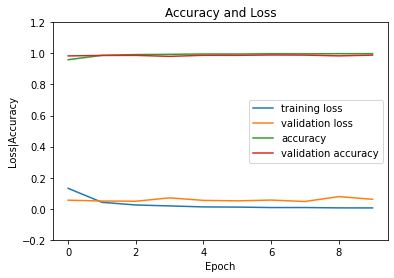

In [16]:
plt.plot(H.history['loss'], label='training loss')
plt.plot(H.history['val_loss'], label='validation loss')
plt.plot(H.history['accuracy'], label='accuracy')
plt.plot(H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.ylim([-.2, 1.2])
plt.legend()
plt.show()


Giá trị dự đoán:  2


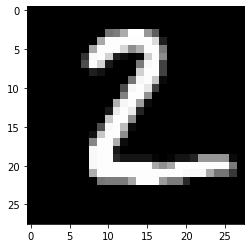

In [18]:
plt.imshow(x_test[1].reshape(28, 28), cmap='gray')

y_pred = model.predict(x_test[1].reshape(1, 28, 28, 1), verbose=0)
print('Giá trị dự đoán: ', np.argmax(y_pred))

## Change the hyperparameters

### Learning rate

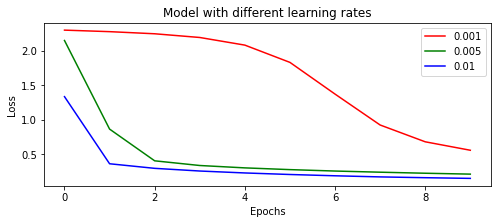

In [19]:
learning_rate = [0.001, 0.005, 0.01]
colors = ['r', 'g', 'b']

plt.figure(figsize=(8, 3))

for i, lr in enumerate(learning_rate):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding="same",
              activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPool2D())
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(lr),
                  metrics=['accuracy'])

    H = model.fit(x_train, y_train,
                  validation_data=(x_val, y_val),
                  batch_size=256,
                  epochs=10,
                  verbose=0)

    plt.plot(H.history['loss'], colors[i])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model with different learning rates')
plt.legend(learning_rate)
plt.show()


### Optimizer

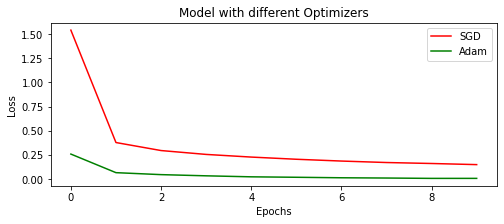

In [20]:
# Thay đổi optimizer
optimizers = [SGD, Adam]
op_name = ['SGD', 'Adam']
plt.figure(figsize=(8, 3))

for i, opt in enumerate(optimizers):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding="same",
              activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPool2D())
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=opt(),
                  metrics=['accuracy'])

    H = model.fit(x_train, y_train, validation_data=(
        x_val, y_val), batch_size=256, epochs=10, verbose=0)
    plt.plot(H.history['loss'], colors[i])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model with different Optimizers')
plt.legend(op_name)
plt.show()


### Kernel size

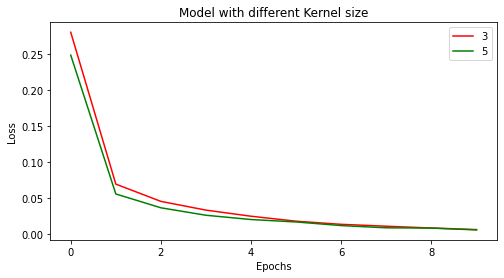

In [21]:
kernel_size = [3, 5]
plt.figure(figsize=(8, 4))

for i, kz in enumerate(kernel_size):
    model = Sequential()
    model.add(Conv2D(32, (kz, kz), padding="same",
              activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(32, (kz, kz), activation='relu'))
    model.add(MaxPool2D())
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])

    H = model.fit(x_train, y_train, validation_data=(
        x_val, y_val), batch_size=256, epochs=10, verbose=0)

    plt.plot(H.history['loss'], colors[i])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model with different Kernel size')
plt.legend(kernel_size)
plt.show()


### The number of kernels

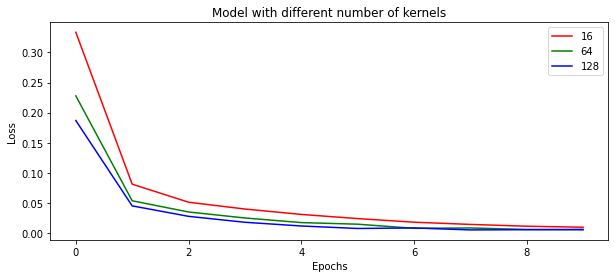

In [7]:
num_kernels = [16, 64, 128]
colors = ['r', 'g', 'b']
plt.figure(figsize=(10, 4))

for i, nk in enumerate(num_kernels):
    model = Sequential()
    model.add(Conv2D(nk, (3, 3), padding="same",
              activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(nk, (3, 3), activation='relu'))
    model.add(MaxPool2D())
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])

    H = model.fit(x_train, y_train, validation_data=(
        x_val, y_val), batch_size=256, epochs=10, verbose=0)

    plt.plot(H.history['loss'], colors[i])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model with different number of kernels')
plt.legend(num_kernels)
plt.show()
